# Import The packages

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data=pd.read_excel("Linear Regression.xlsx",sheet_name=0)

In [4]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [8]:
data.shape

(21613, 5)

In [9]:
data.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [10]:
data.duplicated().sum()

266

In [16]:
data1=data.drop_duplicates(inplace=True)

In [18]:
data.shape

(21347, 5)

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21347.0,541986.883918,368564.096080,75000.0,323900.00,450500.00,648000.0,7700000.0
sqft_living,21347.0,2086.289502,919.716435,290.0,1430.00,1920.00,2550.0,13540.0
bedrooms,21347.0,3.374994,0.932089,0.0,3.00,3.00,4.0,33.0
bathrooms,21347.0,2.119408,0.769485,0.0,1.75,2.25,2.5,8.0
floors,21347.0,1.495058,0.539468,1.0,1.00,1.50,2.0,3.5


In [23]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.701635,0.307048,0.524726,0.256003
sqft_living,0.701635,1.000000,0.574542,0.753606,0.352400
bedrooms,0.307048,0.574542,1.000000,0.513841,0.173016
bathrooms,0.524726,0.753606,0.513841,1.000000,0.497726
floors,0.256003,0.352400,0.173016,0.497726,1.000000


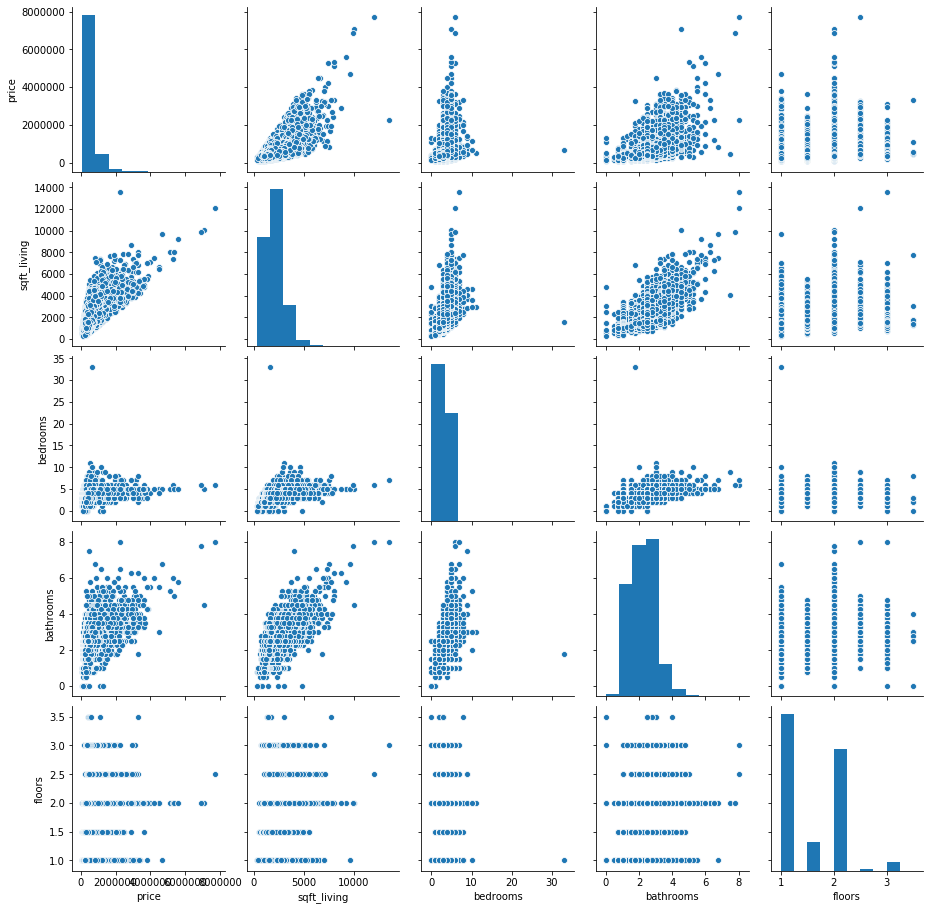

In [25]:
sns.pairplot(data)

# Multiple Regression

In [35]:
x=data.iloc[:,:1]
y=data.iloc[:,1:]

In [36]:
y_train,y_test,x_train,x_test=train_test_split(y,x,test_size=0.2,random_state=2)

In [37]:
mul_reg = LinearRegression()
mul_reg.fit(y_train,x_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
mul_reg.coef_

array([[   301.5523827 , -60701.51326262,  16634.0843308 ,
          2166.98125362]])

In [39]:
mul_reg.intercept_

array([79080.50051328])

In [40]:
predication= mul_reg.predict(y_test)

In [41]:
RMSE = np.sqrt(mean_squared_error(x_test, predication))
r_square = r2_score(x_test, predication)

print('The RSquare value is :- ', r_square)
print('The RMSE value is    :- ', RMSE)

The RSquare value is :-  0.5127689032768147
The RMSE value is    :-  269376.4813023921


# Price Vs Bathroom Linear Regression

In [60]:
data1=pd.read_excel("Linear Regression.xlsx",sheet_name=0)
data1.shape

(21613, 5)

In [61]:
data1.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [62]:
x = data1.drop(['price','sqft_living','bedrooms','floors'], axis=1)
y = data1.drop(['sqft_living','bedrooms','bathrooms','floors'], axis=1)

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size=0.25)

In [64]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

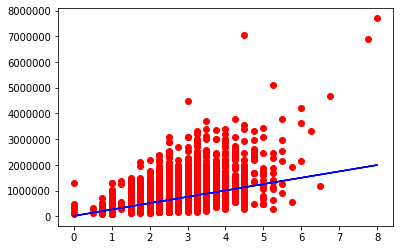

In [65]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.show()

In [66]:
ypred = lr.predict(x_test)

In [67]:
print(r2_score(y_test, ypred))

0.2741517408809929


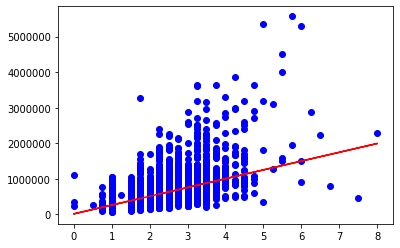

In [68]:
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_test, lr.predict(x_test), color = 'red')
plt.show()

# Price Vs Sq.ft Linear Regression

In [69]:
data1=pd.read_excel("Linear Regression.xlsx",sheet_name=0)
data1.shape

(21613, 5)

In [70]:
data1.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [71]:
x = data1.drop(['price','bathrooms','bedrooms','floors'], axis=1)
y = data1.drop(['sqft_living','bedrooms','bathrooms','floors'], axis=1)

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size=0.25)

In [73]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

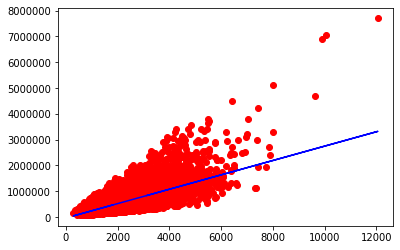

In [74]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.show()

In [75]:
ypred = lr.predict(x_test)
print(r2_score(y_test, ypred))

0.49647682119894676


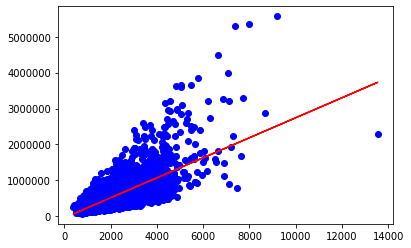

In [76]:
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_test, lr.predict(x_test), color = 'red')
plt.show()

# Price Vs Bedroom Linear Regression

In [77]:
data1=pd.read_excel("Linear Regression.xlsx",sheet_name=0)
data1.shape

(21613, 5)

In [78]:
data1.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [80]:
x = data1.drop(['price','bathrooms','sqft_living','floors'], axis=1)
y = data1.drop(['sqft_living','bedrooms','bathrooms','floors'], axis=1)

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size=0.25)

In [82]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

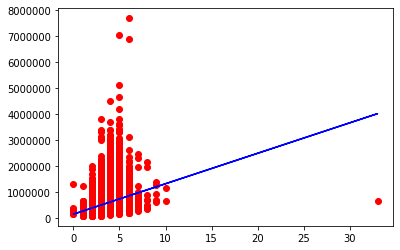

In [83]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.show()

In [84]:
ypred = lr.predict(x_test)
print(r2_score(y_test, ypred))

0.10025622434499692


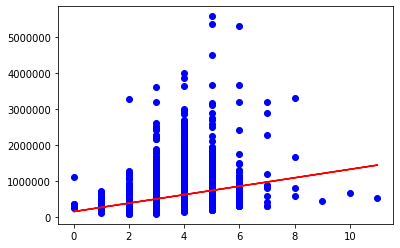

In [85]:
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_test, lr.predict(x_test), color = 'red')
plt.show()

# Price Vs Floor Linear Regression

In [ ]:
data1=pd.read_excel("Linear Regression.xlsx",sheet_name=0)
data1.shape

In [86]:
data1.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [88]:
x = data1.drop(['price','bathrooms','sqft_living','bedrooms'], axis=1)
y = data1.drop(['sqft_living','bedrooms','bathrooms','floors'], axis=1)

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size=0.25)

In [90]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

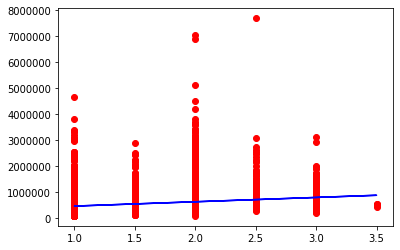

In [91]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.show()

In [92]:
ypred = lr.predict(x_test)
print(r2_score(y_test, ypred))

0.07175399691766837


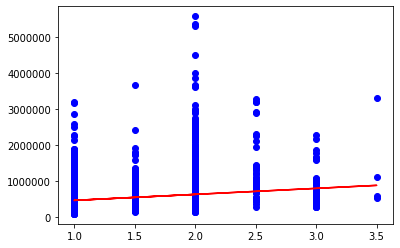

In [93]:
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_test, lr.predict(x_test), color = 'red')
plt.show()